# **Beta-Lactamase Data**

Chanin Nantasenamat

[Data Professor YouTube channel](https://youtube.com/dataprofessor)

In [ ]:
! wget https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip

In [ ]:
! unzip beta_lactamase_CHEMBL29.zip

In [ ]:
! ls *.csv | wc -l

In [1]:
import zipfile
import pandas as pd

zf = zipfile.ZipFile("beta_lactamase_CHEMBL29.zip", "r")
df = pd.concat( (pd.read_csv( zf.open(f) ) for f in zf.namelist() ) )

In [2]:
df

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
...,...,...,...,...,...,...,...,...,...
13,CHEMBL561555,COC(=O)CC(N)(CC(=O)OC)C(=O)OCc1ccccc1,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
14,CHEMBL561821,NC(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)C(=O)OCc...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
15,CHEMBL561896,COC(=O)CC(CC(=O)OC)(NC(=O)Cc1ccccc1)C(=O)OC,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
16,CHEMBL563044,COC(=O)C(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)NC...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format


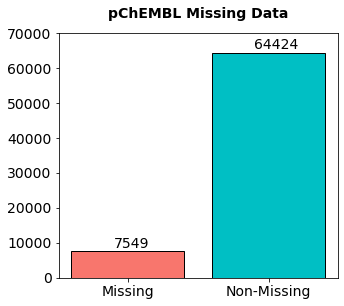

In [3]:
# Bar plot of Missing vs Non-Missing Data

import matplotlib.pyplot as plt

# Data
missing = df.pchembl_value.isnull().sum()
nonmissing = df.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [4]:
# Non-missing data with pChEMBL value
df1 = df[df.pchembl_value.notnull()]
df1

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
47,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,9.0,nM,IC50,8.05,Gil1,assay format
48,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,40.0,nM,IC50,7.40,Gil1,assay format
7,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,70.0,nM,IC50,7.16,Beta-lactamase SCO-1,single protein format
8,CHEMBL403,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,=,6200.0,nM,IC50,5.21,Beta-lactamase SCO-1,single protein format
9,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,10.0,nM,IC50,8.00,Beta-lactamase SCO-1,single protein format
...,...,...,...,...,...,...,...,...,...
57,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,374.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,assay format
90,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,370.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
91,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,10500.0,nM,IC50,4.98,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
107,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,11000.0,nM,Ki,4.96,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format


In [8]:
print (' Number of duplicate molecules in the database is :', str(len(df1[df1['molecule_chembl_id'].duplicated()])))

 Number of duplicate molecules in the database is : 1386


### Check for Nan values

In [5]:
df1.isnull().sum().sum()

#There is 16 missing values in the dataset but as we are interested in pChEMBL values we will not treat them

16

### Here we will group by moleucle ID and fill the last values to avoid NaN for standard deviation 

In [6]:
df2= df1.groupby('molecule_chembl_id').std().fillna(df.groupby('molecule_chembl_id').last())
df2

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,316.200000,6.500000
CHEMBL1024,11220.200000,4.950000
CHEMBL1028,2818.400000,5.550000
CHEMBL1036,39.800000,7.400000
CHEMBL104,10606.601718,0.169706
...,...,...
CHEMBL97643,11220.200000,4.950000
CHEMBL977,631.000000,6.200000
CHEMBL98406,63095.700000,4.200000


In [7]:
df2_group_std_less_2 = df2[df2['pchembl_value'] <2]
df2_group_std_less_2

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL104,10606.601718,0.169706
CHEMBL1089781,2418.627366,0.459891
CHEMBL1091,39575.140197,0.212132
CHEMBL109227,0.000000,0.000000
CHEMBL1126,2545.584412,0.212132
...,...,...
CHEMBL87686,6984.086607,1.866762
CHEMBL87719,339.411255,0.869741
CHEMBL891,7496.901315,1.836146


### The last database without duplicated and with mean for moleucles with standard deviation less than 2
#### df3 is the Intersection between the whole dataframe lwithout molecules with an SDT less than 2 

In [18]:
df3 = df1[~df1['molecule_chembl_id'].isin(df2_group_std_less_2.index)]
df3

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
12,CHEMBL1795572,CO/N=C(/C(=O)NCP(=O)(O)Oc1ccc(C#N)c(F)c1)c1ccc...,=,31000.0,nM,IC50,4.51,Beta-lactamase,single protein format
16,CHEMBL3112752,N[C@@H](Cc1ccc(NC(=O)[C@@H]2CC[C@@H]3CN2C(=O)N...,=,28000.0,nM,IC50,4.55,Beta-lactamase,single protein format
23,CHEMBL3112746,O=C(Nc1ccncc1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)...,=,20000.0,nM,IC50,4.70,Beta-lactamase,single protein format
15,CHEMBL1173339,CCC(S)P(=O)(OC(C)C)OC(C)C,=,2000.0,nM,Ki,5.70,Beta-lactamase,single protein format
16,CHEMBL1172388,CCC(S)P(=O)(O)O,=,15000.0,nM,Ki,4.82,Beta-lactamase,single protein format
...,...,...,...,...,...,...,...,...,...
222,CHEMBL4075406,O=P(O)(O)C(CO)CCCCc1ccccc1,=,4500.0,nM,IC50,5.35,Beta-lactamase VIM-2,assay format
223,CHEMBL4069211,O=P(O)(O)C(CO)CCCc1ccccc1,=,34000.0,nM,IC50,4.47,Beta-lactamase VIM-2,assay format
239,CHEMBL4087458,CCOP(=O)(OCC)C(CS)CCCCc1ccccc1,=,1670.0,nM,IC50,5.78,Beta-lactamase VIM-2,assay format
92,CHEMBL4114669,CC1C/C(=C2/O[C@@H]3CC(=O)N3C2C(=O)O)C(=O)O1,=,3.2,nM,IC50,8.49,Beta-lactamase SHV-1,assay format


### Keep just the first molecule from the duplicated ones and assign to them mean values 

In [20]:
df3.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print( f" Dataframe shape : {df3.shape}")
print (f" Different units in dataframe : {df3.standard_units.unique()}")

 Dataframe shape : (62242, 9)
 Different units in dataframe : ['nM']


/home/adnane/.conda/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df2_group_mean = df3.groupby('molecule_chembl_id').mean()

In [22]:
df4 = df3.replace(df3['pchembl_value'],df2_group_mean['pchembl_value'])
# df3['pchembl_value'] = df2_group_mean['pchembl_value']
df4

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
12,CHEMBL1795572,CO/N=C(/C(=O)NCP(=O)(O)Oc1ccc(C#N)c(F)c1)c1ccc...,=,31000.0,nM,IC50,4.51,Beta-lactamase,single protein format
16,CHEMBL3112752,N[C@@H](Cc1ccc(NC(=O)[C@@H]2CC[C@@H]3CN2C(=O)N...,=,28000.0,nM,IC50,4.55,Beta-lactamase,single protein format
23,CHEMBL3112746,O=C(Nc1ccncc1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)...,=,20000.0,nM,IC50,4.70,Beta-lactamase,single protein format
15,CHEMBL1173339,CCC(S)P(=O)(OC(C)C)OC(C)C,=,2000.0,nM,Ki,5.70,Beta-lactamase,single protein format
16,CHEMBL1172388,CCC(S)P(=O)(O)O,=,15000.0,nM,Ki,4.82,Beta-lactamase,single protein format
...,...,...,...,...,...,...,...,...,...
220,CHEMBL4088285,CC(=O)SCC(CCCc1ccccc1)c1nnn[nH]1,=,42000.0,nM,IC50,4.38,Beta-lactamase VIM-2,assay format
221,CHEMBL4064978,CC(=O)SCC(Cc1ccccc1)c1nnn[nH]1,=,67000.0,nM,IC50,4.17,Beta-lactamase VIM-2,assay format
222,CHEMBL4075406,O=P(O)(O)C(CO)CCCCc1ccccc1,=,4500.0,nM,IC50,5.35,Beta-lactamase VIM-2,assay format
223,CHEMBL4069211,O=P(O)(O)C(CO)CCCc1ccccc1,=,34000.0,nM,IC50,4.47,Beta-lactamase VIM-2,assay format


In [26]:
print(f"The correlation between the modefied pchembl and the original is: {str(df4['pchembl_value'].corr(df3['pchembl_value']))}")

The correlation between the modefied pchembl and the original is: 1.0


In [45]:
print('Number of unique ChEMBL ID:', str(len(df4.molecule_chembl_id.unique()) ))
print('Total number of ChEMBL ID: ', str(len(df)))
print('Number of missing ChEMBL ID: ', str(df.molecule_chembl_id.isnull().sum()))
print('The different units in the dataframe: ', str(df4.standard_type.unique()))

Number of unique ChEMBL ID: 62242
Total number of ChEMBL ID:  71973
Number of missing ChEMBL ID:  0
The different units in the dataframe:  ['IC50' 'Ki' 'Potency' 'Kd']


### Verification of the number of IC50 and KI in the dataframe

In [60]:
print(" Number of IC50 values      :", str(len(df4[df4["standard_type"] == "IC50"])))
print(" Number of Potency values   :", str(len(df4[df4["standard_type"] == "Potency"])))
print(" Number of Ki and Kd values :", str(len(df4[(df4["standard_type"] == "Ki") | (df4["standard_type"] == "Kd")])))

 Number of IC50 values      : 480
 Number of Potency values   : 61421
 Number of Ki and Kd values : 341


## Create different dataframes based on different standard types
We have now for dataframes df4 that contains all molecules, besides others for every standard type

In [66]:
dfIC50 = df4[df4["standard_type"] == "IC50"]
dfIC50.to_csv('data_for_IC50.csv', columns=['molecule_chembl_id', 'canonical_smiles', 'pchembl_value'], index=False)
dfPotency = df4[df4["standard_type"] == "Potency"]
dfPotency.to_csv('data_for_Potency.csv', columns=['molecule_chembl_id', 'canonical_smiles', 'pchembl_value'], index=False)
dfKid = df4[(df4["standard_type"] == "Ki") | (df4["standard_type"] == "Kd")] 
dfKid.to_csv('data_for_IC50.csv', columns=['molecule_chembl_id', 'canonical_smiles', 'pchembl_value'], index=False)


In [28]:
import matplotlib.pyplot as plt

unique = len(df.molecule_chembl_id.unique())
not_unique = len(df) - unique

x = ['Unique', 'Redundant']
y = [unique, not_unique]



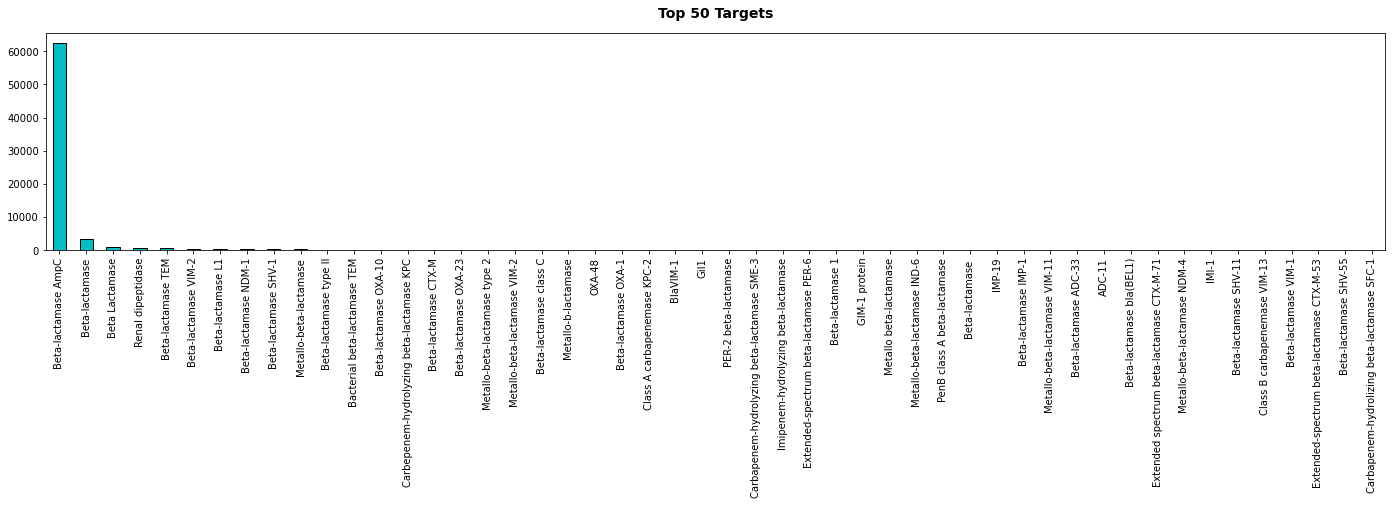

In [30]:
df.target_pref_name.value_counts()[0:50].plot.bar(figsize=(24,4), color='#00BFC4', ec='black')

plt.title('Top 50 Targets', fontsize=14, fontweight='black', pad=15)
plt.show()

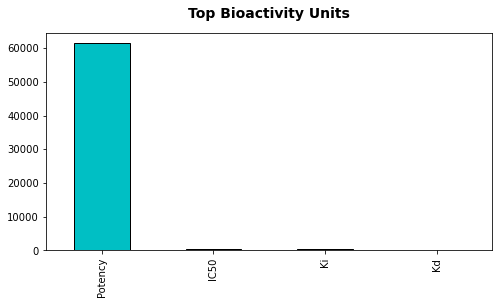

In [56]:
# Top 10 Bioactivity units
df4.standard_type.value_counts()[:10].plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

In [ ]:
bao_labels = df2.bao_label.value_counts()
bao_labels.plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of BioAssay Ontology', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
bao_labels

In [ ]:
df2.pchembl_value.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of pChEMBL values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pChEMBL values <5 == 'Inactive'
pChEMBL values > 6 == 'Active'
pChEMBL values 5-6 == 'Intermediate'